# p-value estimation of clones in clusters

In [176]:
import numpy as np
import pandas as pd

In [177]:
df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")
df

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_3903/1233452112.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [178]:
df["mutation"] = df["chrom"].astype(str) + ":" + df['coord'].astype(str) + ":" + df['ref'] + ":" +  df['alt']
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A


In [179]:
df_2 = pd.read_csv("../data/laks/ov2295_clone_clusters.csv.gz")
df = pd.merge(df, df_2, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C


In [180]:
df_cell_cn = pd.read_csv("../scratch/data/ov2295_cell_cn.csv.gz")
df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6
...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0


In [181]:
binsize = int(df_cell_cn['end'][0])
binsize

500000

In [182]:
df = df.copy()
df['bin'] = df['coord'] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id,bin
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001
...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001


In [183]:
df['chrom'] = df['chrom'].astype(str)
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,mutation,clone_id,bin,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [184]:
df_cell_snv = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_snv_counts.csv.gz", low_memory=False)
df_cell_snv

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [185]:
df = df_cell_snv
df["bin_start"] = df["coord"] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,bin_start
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001


In [186]:
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin_start'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [187]:
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A


In [188]:
df_cell_clusters = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_clone_clusters.csv.gz")
df_cell_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [189]:
df = pd.merge(df, df_cell_clusters, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C


# Run p-value for SCOPE

In [190]:
kmeans_labels = pd.read_csv("../data/laks/scope/kmeans_cleaned_clones.csv", index_col=0)
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [191]:
kmeans_labels['clone'].value_counts()

clone
6     3171
2     2812
1     2407
4     1400
3     1189
9      954
7      685
5      640
0      310
11     252
10     248
Name: count, dtype: int64

In [192]:
df_scope = pd.merge(df, kmeans_labels, on='mutation', how='left')
df_scope

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,4
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,4
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,4
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,4
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,1


In [193]:
min_copy_number = df_scope['state'].min()
max_copy_number = df_scope['state'].max()

min_copy_number, max_copy_number

(np.int64(0), np.int64(11))

In [194]:
import numpy as np


def get_alt_and_total(df, clone_labels):

    clusters = list("ABCDEFGHI")
    clones = sorted(clone_labels['clone'].unique().tolist())


    n_clusters = len(clusters)
    n_clones = max(clones) + 1

    cluster_to_idx = {c: i for i, c in enumerate(clusters)}
    clone_to_idx = {c: c for i, c in enumerate(clones)}

    alts = np.zeros((max_copy_number + 1, n_clusters, n_clones), dtype=np.int32)
    totals = np.zeros_like(alts)

    for _, row in df.iterrows():
        state = int(row['state'])
        if 1 <= state <= max_copy_number:
            try:
                ci = cluster_to_idx.get(row['clone_id'])
                cj = clone_to_idx.get(row['clone'])
                if ci is not None and cj is not None:
                    alts[state, ci, cj] += row['alt_counts']
                    totals[state, ci, cj] += row['total_counts']
            except Exception as e:
                print(e)
                print(row)
    
    return totals, alts


In [195]:
total_scope, alt_scope = get_alt_and_total(df_scope, kmeans_labels)

In [196]:
import sys
sys.path.append('..')

In [197]:
from src.phylogeny_utils import *

In [198]:
SOLUTION = 1
SCOPE_OUT_PATH = f"../data/laks/scope/kmeans_065_include_3_5_7/solution_{SOLUTION}"

In [199]:
X = pd.read_csv(f"{SCOPE_OUT_PATH}/X.csv", index_col=0)
G = pd.read_csv(f"{SCOPE_OUT_PATH}/G.csv", index_col=0)
B = pd.read_csv(f"{SCOPE_OUT_PATH}/B.csv", index_col=0)

B.columns = B.columns.astype(int)
G.columns = G.columns.astype(int)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


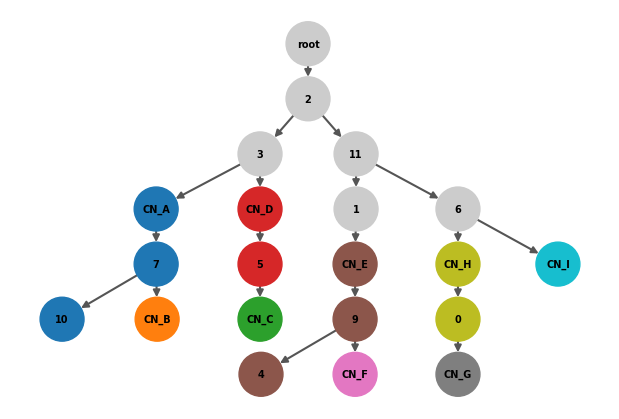

In [200]:
solT_mut, _ = generate_perfect_phylogeny(B)
fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)

draw_clone_tree(fixed_T)

In [201]:
row_cols = []
import string
for i, cluster in enumerate(string.ascii_uppercase[:9], start=1):
    for j in range(12):
        if j == 8: continue
        if nx.has_path(fixed_T, j, f"CN_{cluster}"):
            print(cluster, j)
            row_cols.append((i - 1, j))

print(row_cols)

A 2
A 3
B 2
B 3
B 7
C 2
C 3
C 5
D 2
D 3
E 1
E 2
E 11
F 1
F 2
F 9
F 11
G 0
G 2
G 6
G 11
H 2
H 6
H 11
I 2
I 6
I 11
[(0, 2), (0, 3), (1, 2), (1, 3), (1, 7), (2, 2), (2, 3), (2, 5), (3, 2), (3, 3), (4, 1), (4, 2), (4, 11), (5, 1), (5, 2), (5, 9), (5, 11), (6, 0), (6, 2), (6, 6), (6, 11), (7, 2), (7, 6), (7, 11), (8, 2), (8, 6), (8, 11)]


In [202]:
import seaborn as sns
import matplotlib.patches as patches
from scipy.stats import binom, betabinom


def hypothesis_test(alts, totals, dispersion_param=200, error_rate=0.01):

    pvals = np.ones_like(alts, dtype=np.float64)  # fill with 1s by default
    
    for copy_number in range(1, max_copy_number + 1):
        alt = alts[copy_number]
        total = totals[copy_number]

        # Effective success probability after accounting for error
        true_p = 1.0 / copy_number
        p_eff = true_p * (1 - error_rate)

        # Beta-binomial parameters
        ado_alpha = p_eff * dispersion_param
        ado_beta = dispersion_param * (1 - p_eff)

        # Compute p-values (vectorized)
        pvals_slice = betabinom.cdf(alt, total, ado_alpha, ado_beta)
        pvals[copy_number] = pvals_slice

    return pvals


In [203]:
pvals = hypothesis_test(alt_scope, total_scope, dispersion_param=300)

In [204]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols:
        is_rejected = pvals[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 2 	p 5.995071133892092e-09 	X
Copy Number: 1 	CN: A 	Cluster: 3 	p 3.1309952114735614e-10 	X
Copy Number: 1 	CN: B 	Cluster: 2 	p 2.2608702719415857e-09 	X
Copy Number: 1 	CN: B 	Cluster: 3 	p 3.66703711010713e-09 	X
Copy Number: 1 	CN: B 	Cluster: 7 	p 2.5201427827154074e-29 	X
Copy Number: 1 	CN: C 	Cluster: 2 	p 1.7704225832173523e-12 	X
Copy Number: 1 	CN: C 	Cluster: 3 	p 1.640895569276153e-09 	X
Copy Number: 1 	CN: C 	Cluster: 5 	p 3.4173617872603104e-40 	X
Copy Number: 1 	CN: D 	Cluster: 2 	p 1.844064468849165e-15 	X
Copy Number: 1 	CN: D 	Cluster: 3 	p 1.963926235157674e-12 	X
Copy Number: 1 	CN: E 	Cluster: 2 	p 2.091747116542396e-06 	X
Copy Number: 1 	CN: E 	Cluster: 11 	p 0.010000000000002465 	X
Copy Number: 1 	CN: F 	Cluster: 2 	p 0.043021594388861585 	X
Copy Number: 1 	CN: F 	Cluster: 9 	p 0.0010185272368355967 	X
Copy Number: 1 	CN: G 	Cluster: 0 	p 8.215567203603641e-20 	X
Copy Number: 1 	CN: G 	Cluster: 2 	p 1.0096196940269105e-07 	X
Copy

# Run p-value for Phertilizer

In [205]:
snv_clusters = pd.read_csv("../phertilizer-outputs/laks/SNV_clusters.csv")
snv_clusters['mutation'] = snv_clusters['mutation'].str.split('_').str[1]
snv_clusters.rename(columns={'cluster': 'clone'}, inplace=True)
snv_clusters

,clone,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [206]:
df_phertilizer = pd.merge(df, snv_clusters, on='mutation', how='left')
# df_phertilizer['clone'] = df_phertilizer['clone'].astype(int)
df_phertilizer

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,8.0
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,8.0
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,8.0
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,8.0
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,7.0
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,7.0
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,7.0
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,7.0


In [207]:
df_phertilizer['clone']

0          8.0
1          8.0
2          8.0
3          8.0
4          8.0
          ... 
3800279    7.0
3800280    7.0
3800281    7.0
3800282    7.0
3800283    7.0
Name: clone, Length: 3800284, dtype: float64

In [208]:
total_phertilizer, alt_phertilizer = get_alt_and_total(df_phertilizer, snv_clusters)


In [209]:
clonal_relations = [
    ('A', [0, 1, 3, 5]), 
    ('B', [0, 1, 3]), 
    ('C', [0, 1, 3]), 
    ('D', [0, 1, 3]), 
    ('E', [0, 7]), 
    ('F', [0, 7]), 
    ('G', [0, 1]), 
    ('H', [0, 1]), 
    ('I', [0, 1]), 
]

row_cols_phert = []
for cluster, clones in clonal_relations:
    for clone in clones:
        row_cols_phert.append((ord(cluster) - ord('A'), clone))

row_cols_phert

[(0, 0),
 (0, 1),
 (0, 3),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 3),
 (4, 0),
 (4, 7),
 (5, 0),
 (5, 7),
 (6, 0),
 (6, 1),
 (7, 0),
 (7, 1),
 (8, 0),
 (8, 1)]

In [210]:
pvals_phertilizer = hypothesis_test(alt_phertilizer, total_phertilizer, dispersion_param=300)

In [211]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols_phert:
        is_rejected = pvals_phertilizer[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer[copy_number, row, col], "\tTotal Reads", total_phertilizer[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 0 	p 4.781936397016052e-31 	Total Reads 6653 	X
Copy Number: 1 	CN: A 	Cluster: 1 	p 7.698429928108293e-40 	Total Reads 177 	X
Copy Number: 1 	CN: A 	Cluster: 3 	p 1.078739054315534e-10 	Total Reads 2328 	X
Copy Number: 1 	CN: A 	Cluster: 5 	p 2.5625423888971873e-09 	Total Reads 1757 	X
Copy Number: 1 	CN: B 	Cluster: 0 	p 7.857843432933543e-31 	Total Reads 4978 	X
Copy Number: 1 	CN: B 	Cluster: 1 	p 1.0288373815772445e-21 	Total Reads 88 	X
Copy Number: 1 	CN: B 	Cluster: 3 	p 6.739603602140905e-10 	Total Reads 1867 	X
Copy Number: 1 	CN: C 	Cluster: 0 	p 9.59526981028976e-31 	Total Reads 5849 	X
Copy Number: 1 	CN: C 	Cluster: 1 	p 1.7898658604164016e-31 	Total Reads 121 	X
Copy Number: 1 	CN: C 	Cluster: 3 	p 1.0875074311303521e-13 	Total Reads 2210 	X
Copy Number: 1 	CN: D 	Cluster: 0 	p 8.638626793397937e-33 	Total Reads 7007 	X
Copy Number: 1 	CN: D 	Cluster: 1 	p 5.211157195916066e-26 	Total Reads 116 	X
Copy Number: 1 	CN: D 	Cluster: 3 	p 8.716

# Combined p-values

In [212]:
import numpy as np
from scipy.stats import combine_pvalues

def combine_pvalues_across_copies(pvals, method='fisher'):
    """
    Combine p-values across copy numbers for each (cluster, clone) pair.
    pvals: 3D np.ndarray [copy_number, cluster, clone]
    Returns: 2D np.ndarray [cluster, clone] of combined p-values
    """
    max_copy_number, n_clusters, n_clones = pvals.shape[0] - 1, pvals.shape[1], pvals.shape[2]
    combined = np.ones((n_clusters, n_clones), dtype=np.float64)

    for i in range(n_clusters):
        for j in range(n_clones):
            # Extract all p-values for this cluster/clone across copy numbers
            vals = pvals[2:max_copy_number + 1, i, j]
            # Remove NaNs or invalids
            vals = vals[np.isfinite(vals)]
            if len(vals) > 0:
                _, p_combined = combine_pvalues(vals, method=method)
                combined[i, j] = p_combined
            else:
                combined[i, j] = np.nan
    return combined

In [213]:
import numpy as np
from scipy.stats import combine_pvalues

def combine_weighted_pvalues(pvals, totals, eps=1e-15):
    """
    Combine p-values across copy numbers for each cluster-clone pair using weighted Stouffer.
    
    Parameters
    ----------
    pvals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of p-values
    totals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of weights (e.g., total_counts)
    eps : float
        Small value to clip p-values away from 0 or 1 to avoid infinities
    
    Returns
    -------
    combined : np.ndarray
        2D array [n_clusters, n_clones] of combined p-values
    """
    
    n_states, n_clusters, n_clones = pvals.shape
    combined = np.ones((n_clusters, n_clones))
    
    start_copy_number = 2  # skip 0 if you’re indexing by copy_number
    
    for i in range(n_clusters):
        for j in range(n_clones):
            pvals_ij = pvals[start_copy_number:, i, j]
            weights_ij = totals[start_copy_number:, i, j]

            # Mask valid entries with finite p-values and positive weights
            mask = np.isfinite(pvals_ij) & (weights_ij > 0)
            if np.any(mask):
                # Clip p-values to avoid -inf/+inf
                pvals_safe = np.clip(pvals_ij[mask], eps, 1 - eps)
                
                # Weighted Stouffer combination
                _, p_comb = combine_pvalues(
                    pvals_safe,
                    method='stouffer',
                    weights=weights_ij[mask]
                )
                combined[i, j] = p_comb
            else:
                combined[i, j] = np.nan
    return combined


In [214]:
pvals_phertilizer_combined = combine_weighted_pvalues(pvals_phertilizer, total_phertilizer)

In [215]:
for row, col in row_cols_phert:
    is_rejected = pvals_phertilizer_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer_combined[row, col], "\tX" if is_rejected else "")

CN: A 	Cluster: 1 	p 0.017414997149836933 	X


In [216]:
pvals_scope_combined = combine_pvalues_across_copies(pvals)

In [217]:
for row, col in row_cols:
    is_rejected = pvals_scope_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_scope_combined[row, col], "\tX" if is_rejected else "")

In [218]:
row_cols

[(0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (1, 7),
 (2, 2),
 (2, 3),
 (2, 5),
 (3, 2),
 (3, 3),
 (4, 1),
 (4, 2),
 (4, 11),
 (5, 1),
 (5, 2),
 (5, 9),
 (5, 11),
 (6, 0),
 (6, 2),
 (6, 6),
 (6, 11),
 (7, 2),
 (7, 6),
 (7, 11),
 (8, 2),
 (8, 6),
 (8, 11)]

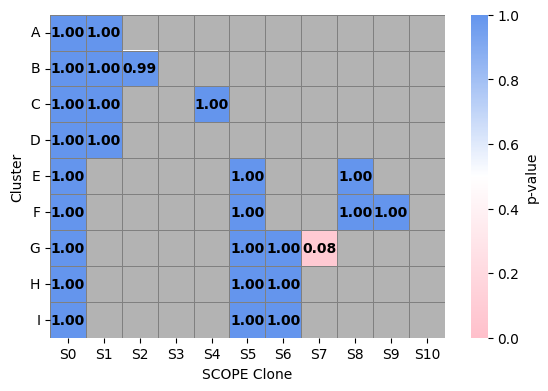

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Example p-value DataFrame
df = pd.DataFrame(pvals_scope_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
col_order = [2, 3, 7, 10, 5, 11, 6, 0, 1, 9, 4]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["pink", "white", "cornflowerblue"])
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'}
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

plt.gca().set_xticklabels([f"S{i}" for i in range(df.shape[1])])

plt.yticks(rotation=0)
plt.xlabel("SCOPE Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(f"../data/laks/scope/kmeans_065_include_3_5_7/solution_{SOLUTION}/p-values.svg")
plt.show()


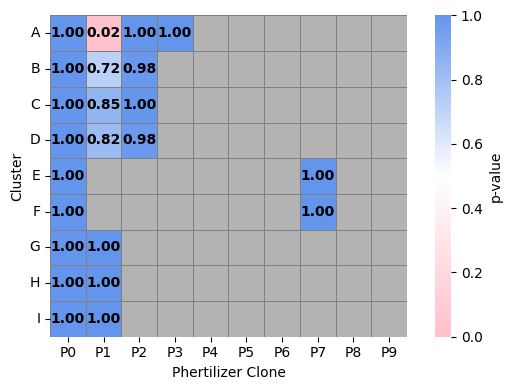

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Example p-value DataFrame
df = pd.DataFrame(pvals_phertilizer_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_phert)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
col_order = [0, 1, 3, 5, 6, 4, 2, 7, 8, 9]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["pink", "white", "cornflowerblue"])
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'}
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

plt.gca().set_xticklabels([f"P{i}" for i in range(df.shape[1])])

plt.yticks(rotation=0)
plt.xlabel("Phertilizer Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../phertilizer-outputs/laks/p-values.svg")
plt.show()


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_3903/3022828111.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(format_pval)


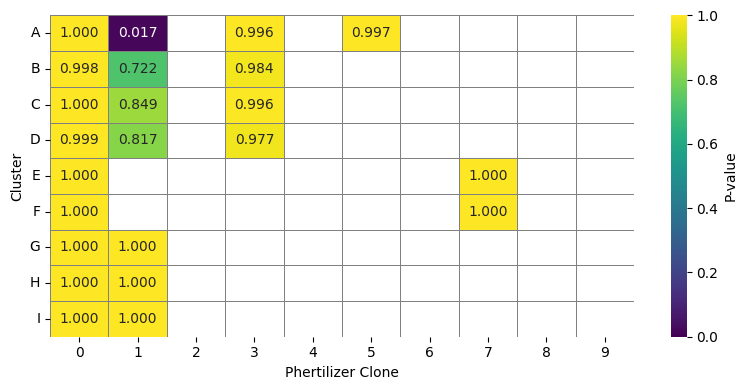

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example p-value DataFrame
df = pd.DataFrame(pvals_phertilizer_combined, index=list("ABCDEFGHI"))

# Formatted annotations (human-readable)
def format_pval(p, threshold=0.001):
    if p < threshold:
        return f"<{threshold:.3f}"
    else:
        return f"{p:.3f}"

df_formatted = df.applymap(format_pval)

# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_phert)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap='viridis',
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'P-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1
)
plt.yticks(rotation=0)
plt.xlabel("Phertilizer Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../phertilizer-outputs/laks/p-values.svg")
plt.show()


# Check p-values for Laks' tree

In [51]:
import pandas as pd
import numpy as np

In [78]:
df_tree = pd.read_csv("../data/laks/ov2295_nodes.csv.gz")
df_tree

,variant_id,node,loss,origin,presence,ml_origin,ml_presence,ml_loss
0,10:100129846:C:A,0,0.000000e+00,4.573674e-05,0.000000e+00,0,0,0
1,10:100129846:C:A,1,4.542663e-05,3.979706e-41,3.101192e-07,0,0,0
2,10:100129846:C:A,2,3.080443e-07,3.926630e-41,2.074915e-09,0,0,0
3,10:100129846:C:A,3,2.074915e-09,8.623432e-67,0.000000e+00,0,0,0
4,10:100129846:C:A,4,2.074915e-09,8.588990e-55,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...
239151,X:99571629:G:T,12,4.783274e-116,9.932175e-01,6.782464e-03,1,1,0
239152,X:99571629:G:T,13,6.894618e-84,1.015949e-30,1.000000e+00,0,1,0
239153,X:99571629:G:T,14,6.980025e-69,1.003518e-45,1.000000e+00,0,1,0
239154,X:99571629:G:T,15,6.653350e-18,1.052790e-96,1.000000e+00,0,1,0


In [82]:
df_tree_mut_origin = df_tree.loc[df_tree.groupby('variant_id')['origin'].idxmax()].reset_index(drop=True)
df_tree_mut_origin.rename(columns={'variant_id': 'mutation', 'node': 'clone'}, inplace=True)
df_tree_mut_origin['clone'].value_counts()

clone
9     3407
12    3175
0     3023
1     1262
10    1105
2      731
5      509
13     238
3      158
8      131
16      99
11      79
15      43
7       41
14      29
6       27
4       11
Name: count, dtype: int64

In [83]:
df_laks = pd.merge(df, df_tree_mut_origin, on='mutation', how='left')
df_laks


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,state,mutation,clone_id,clone,loss,origin,presence,ml_origin,ml_presence,ml_loss
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,1,1:19671432:C:T,NaN,10,4.641052e-22,0.991506,0.008494,1,1,0
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,2,1:19671432:C:T,H,10,4.641052e-22,0.991506,0.008494,1,1,0
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,2,1:19671432:C:T,H,10,4.641052e-22,0.991506,0.008494,1,1,0
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,2,1:19671432:C:T,NaN,10,4.641052e-22,0.991506,0.008494,1,1,0
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,2,1:19671432:C:T,I,10,4.641052e-22,0.991506,0.008494,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,1,5:62716827:T:A,D,9,4.334587e-19,0.862315,0.119017,1,1,0
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,1,5:62716827:T:A,C,9,4.334587e-19,0.862315,0.119017,1,1,0
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,1,5:62716827:T:A,A,9,4.334587e-19,0.862315,0.119017,1,1,0
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,1,5:62716827:T:A,C,9,4.334587e-19,0.862315,0.119017,1,1,0


In [84]:
total_laks, alt_laks = get_alt_and_total(df_laks, df_tree_mut_origin)

In [85]:
clonal_relations = [
    ('A', [0, 1, 2]), 
    ('B', [0, 1, 2]), 
    ('C', [0, 1, 5]), 
    ('D', [0, 1, 5]), 
    ('E', [0, 8, 9]), 
    ('F', [0, 8, 9]), 
    ('G', [0, 8, 12, 13]), 
    ('H', [0, 8, 12, 13]), 
    ('I', [0, 8, 12]), 
]

row_cols_laks = []
for cluster, clones in clonal_relations:
    for clone in clones:
        row_cols_laks.append((ord(cluster) - ord('A'), clone))

row_cols_laks

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 5),
 (3, 0),
 (3, 1),
 (3, 5),
 (4, 0),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 8),
 (6, 12),
 (6, 13),
 (7, 0),
 (7, 8),
 (7, 12),
 (7, 13),
 (8, 0),
 (8, 8),
 (8, 12)]

In [102]:
pvals_laks = hypothesis_test(alt_laks, total_laks, dispersion_param=300)

In [103]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols_laks:
        is_rejected = pvals_laks[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_laks[copy_number, row, col], "\tTotal Reads", total_laks[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 0 	p 3.1383747720793097e-17 	Total Reads 6013 	X
Copy Number: 1 	CN: A 	Cluster: 1 	p 5.403144074001707e-12 	Total Reads 2348 	X
Copy Number: 1 	CN: A 	Cluster: 2 	p 5.262238542068459e-10 	Total Reads 1564 	X
Copy Number: 1 	CN: B 	Cluster: 0 	p 6.533037579778325e-16 	Total Reads 4430 	X
Copy Number: 1 	CN: B 	Cluster: 1 	p 2.8240760680798017e-11 	Total Reads 1889 	X
Copy Number: 1 	CN: B 	Cluster: 2 	p 1.7062430858572618e-28 	Total Reads 1238 	X
Copy Number: 1 	CN: C 	Cluster: 0 	p 2.1347288065073214e-16 	Total Reads 5237 	X
Copy Number: 1 	CN: C 	Cluster: 1 	p 5.08557260020847e-12 	Total Reads 2217 	X
Copy Number: 1 	CN: C 	Cluster: 5 	p 9.292369600690744e-15 	Total Reads 909 	X
Copy Number: 1 	CN: D 	Cluster: 0 	p 3.236178119125814e-19 	Total Reads 6285 	X
Copy Number: 1 	CN: D 	Cluster: 1 	p 3.689730649431795e-14 	Total Reads 2725 	X
Copy Number: 1 	CN: D 	Cluster: 5 	p 8.539595297048257e-19 	Total Reads 1162 	X
Copy Number: 1 	CN: E 	Cluster: 0 	p 5

In [104]:
pvals_laks_combined = combine_weighted_pvalues(pvals_laks, total_laks)

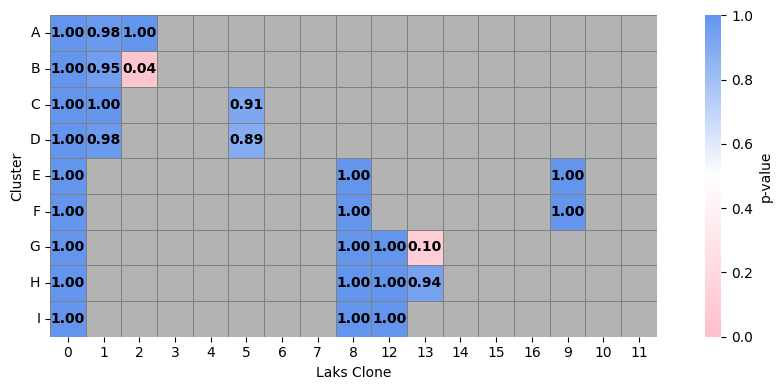

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Example p-value DataFrame
df = pd.DataFrame(pvals_laks_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_laks)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
col_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 9, 10, 11]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["pink", "white", "cornflowerblue"])
# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'}
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

# plt.gca().set_xticklabels([f"L{i}" for i in range(df.shape[1])])

plt.yticks(rotation=0)
plt.xlabel("Laks Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../data/laks/laks-p-values.svg")
plt.show()
